In [8]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd

from sklearn.datasets import make_s_curve
data, color = make_s_curve(n_samples=1000)

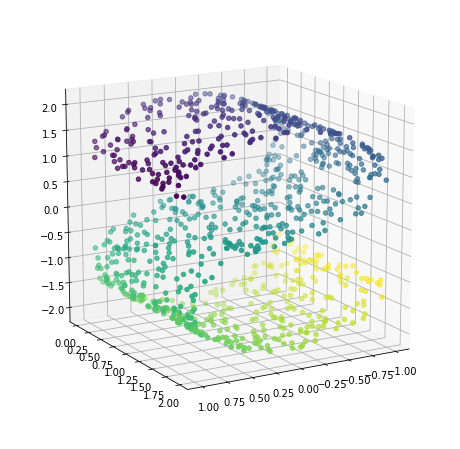

In [9]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=data[:,0],ys=data[:,1],zs=data[:,2],c=color)
ax.view_init(15,60)

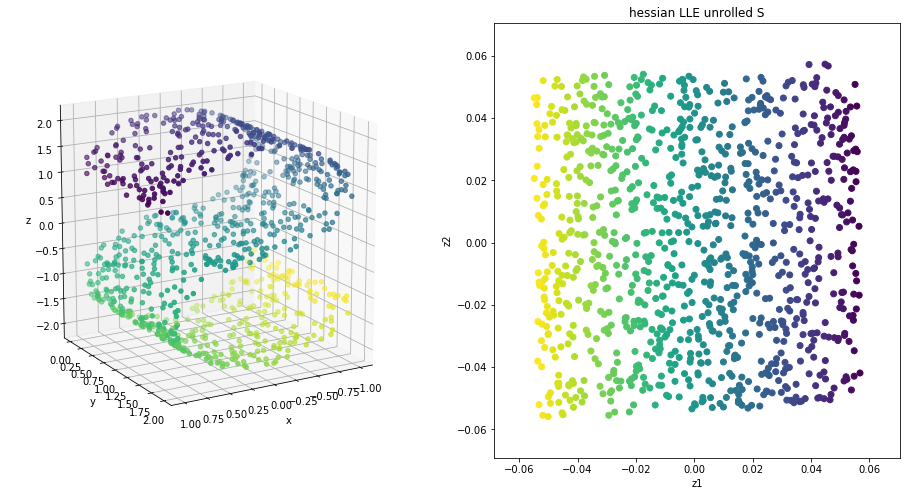

In [11]:
from sklearn.manifold import LocallyLinearEmbedding
n_neighbors = 25 # play with this and the method and see how visualization changes
n_components = 2
method = 'hessian'
lle = LocallyLinearEmbedding(n_neighbors=n_neighbors,
                             n_components=n_components,
                             reg=0.001,# regularization addition to combat getting singular matrices
                             eigen_solver='auto',
                             tol=1e-6, # for arpack eigensolver
                             max_iter=100, # for arpack eigensolver
                             method=method, # 'modified', 'hessian', 'ltsa'
                                            # method also depends on how many neighors vs components we have
                             hessian_tol=0.0001, # tolerance for hessian method
                             modified_tol=1e-12, # tolerance for modified method
                             neighbors_algorithm='auto',
                             random_state=0,
                             n_jobs=2
                            )
data_transf = lle.fit_transform(data)
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(121, projection='3d')
ax.scatter(xs=data[:,0],ys=data[:,1],zs=data[:,2],c=color)
ax.view_init(15,60)
plt.xlabel('x')
plt.ylabel('y')
ax.set_zlabel('z')
ax = fig.add_subplot(122)
ax.scatter(x=data_transf[:,0],y=data_transf[:,1],c=color)
plt.xlabel('z1')
plt.ylabel('z2')
plt.title(f'{method} LLE unrolled S')
plt.show()

In [4]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import StratifiedShuffleSplit

data = fetch_openml('mnist_784', version=1)#Get data from https://www.openml.org/d/554
dfData = pd.DataFrame(np.c_[data["data"],data["target"]],columns = data["feature_names"]+["target"])
stratSplit = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)

for train_index, test_index in stratSplit.split(dfData[data["feature_names"]], dfData["target"]):
    X_train = dfData[data["feature_names"]].iloc[train_index]
    X_test = dfData[data["feature_names"]].iloc[test_index]
    
    y_train = dfData["target"].iloc[train_index]
    y_test = dfData["target"].iloc[test_index]

Random Forest Classifier original dataset score: 0.893
Fit and score time: 4.64s

Random Forest Classifier 2 components score: 0.29
Fit and score time using 2 component standard LLE result: 0.48s

Random Forest Classifier original dataset score: 0.89
Fit and score time: 4.06s

Random Forest Classifier 2 components score: 0.564
Fit and score time using 2 component modified LLE result: 0.46s

Random Forest Classifier original dataset score: 0.894
Fit and score time: 5.23s

Random Forest Classifier 2 components score: 0.444
Fit and score time using 2 component hessian LLE result: 0.5s



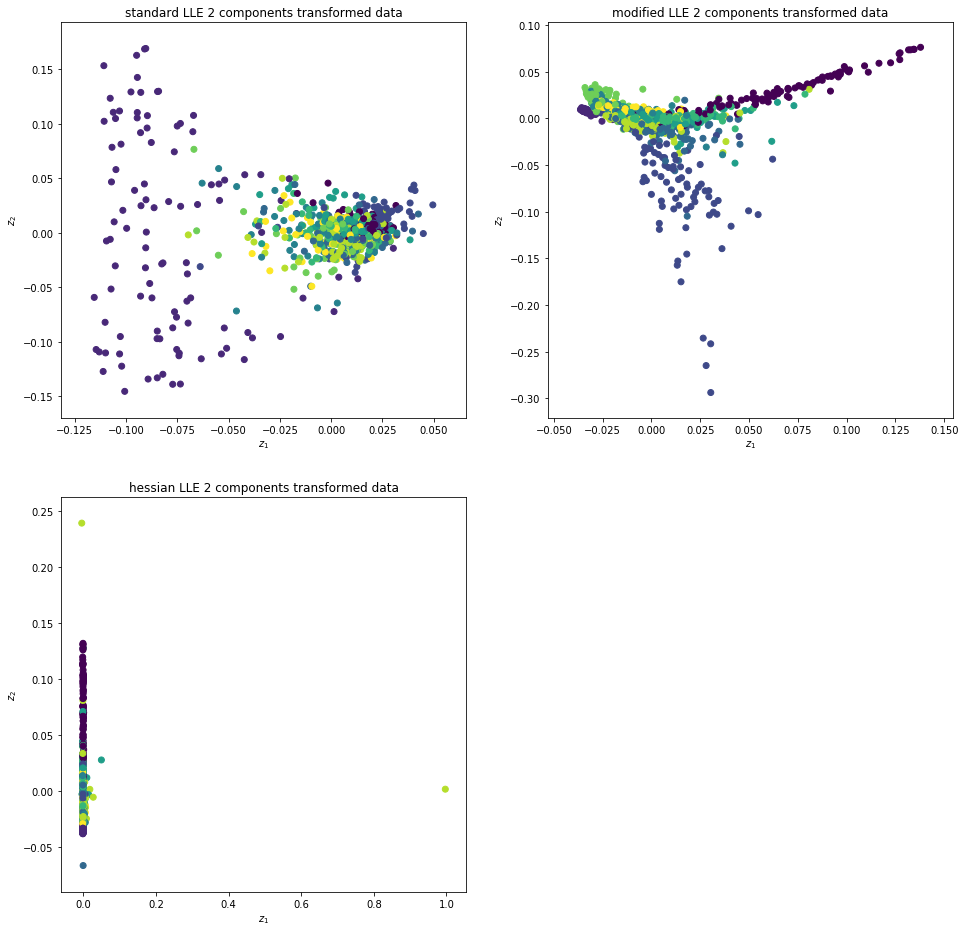

In [5]:
from sklearn.ensemble import RandomForestClassifier
import time
rfc_clf = RandomForestClassifier()

n_neighbors = 35
n_components = 2
numToPlot = 1000
methods = ['standard','modified','hessian']

fig = plt.figure(figsize=(16,16))
for method in methods:
    ax = fig.add_subplot(2,2,methods.index(method)+1)
    lle = LocallyLinearEmbedding(n_neighbors=n_neighbors,
                                 n_components=n_components,
                                 method=method
                                )

    X_train_transf = lle.fit_transform(X_train.iloc[:numToPlot])
    X_test_transf = lle.transform(X_test)

    plt.scatter(X_train_transf[:, 0], X_train_transf[:, 1], c=y_train.astype(int).iloc[:numToPlot])
    plt.title(f'{method} LLE 2 components transformed data')
    plt.xlabel(r'$z_1$')
    plt.ylabel(r'$z_2$')

    start = time.time()
    print('Random Forest Classifier original dataset score:',round(rfc_clf.fit(X_train.iloc[:numToPlot],
                                                                               y_train.iloc[:numToPlot]). \
                                                               score(X_test, y_test),3))
    print('Fit and score time:',str(round(time.time()-start,2))+'s\n')
    start = time.time()
    print('Random Forest Classifier 2 components score:',round(rfc_clf.fit(X_train_transf,y_train.iloc[:numToPlot]). \
                                                               score(X_test_transf, y_test),3))
    print(f'Fit and score time using 2 component {method} LLE result:',str(round(time.time()-start,2))+'s\n')
plt.show()

In [6]:
n_components = 100
lle_100 = LocallyLinearEmbedding(n_neighbors=n_neighbors,
                                 n_components=n_components
                                )
X_train_transf = lle_100.fit_transform(X_train.iloc[:numToPlot])
X_test_transf = lle_100.transform(X_test)
start = time.time()

print('Random Forest Classifier 100 components score:',round(rfc_clf.fit(X_train_transf,y_train.iloc[:numToPlot]). \
                                                           score(X_test_transf, y_test),3))
print('Fit and score time using 100 component standard LLE result:',str(round(time.time()-start,2))+'s\n')

Random Forest Classifier 100 components score: 0.863
Fit and score time using 100 component standard LLE result: 0.93s

